# Bivariat
## Korelasi dan Regresi Linier
### Scatter Plot
Dalam analisis bivariat, plot yang digunakan adalah Scatter Plot di mana untuk menggambarkan hubungan antara dua variabel.
1. Variabel terikat digambarkan di sumbu Y, merupakan variabel yang diperkirakan (dependen)
2. Variabel bebas digambarkan di sumbu X, merupakan variabel yang menaksir variabel terikat (sumbu Y) (independen)

### Koefisien Korelasi (Corrcoef <i> r </i>)
Menggambarkan hubungan antara dua variabel menggunakan skala interval. Interpretasi koefisien korelasi sebagai berikut:
1. Memiliki nilai antara -1 dan 1, di mana positif-negatifnya menunjukkan arah dan kuatnya hubungan kedua variabel.
2. Semakin mendekati nilai minimum (-1) dan maksimum (1), maka semakin kuat kecenderungan hubungan keduanya. Sebaliknya, apabila semakin mendekati 0 maka semakin lemah hubungannya.
3. Koefisien korelasi bernilai 0 berarti tidak ada hubungan antar keduanya.
4. Korelasi positif: Semakin besar nilai X, maka semakin besar pula nilai Y-nya. Sebaliknya korelasi negatif berarti semakin besar nilai X, maka semakin kecil nilai Y.

#### Formula
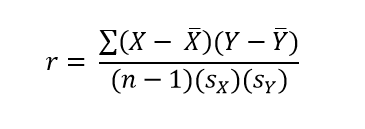
Formula di atas adalah gabungan kalkulasi <b> covariance / (std_X)(std_Y) </b>

#### Case
Menghitung koefisien korelasi:


In [1]:
import pandas as pd
import numpy as np

#informasi - random int generator
np.random.seed(42)
data1 = np.sort(np.random.randint(100, 1000, 30))
data2 = np.sort(np.random.randint(20, 500, 30))
data = pd.DataFrame({'X' : data1, 'Y' : data2})

#preprocess
X_diff = data1 - np.mean(data1)
Y_diff = data2 - np.mean(data2)
s1 = np.std(data1, ddof = 1)
s2 = np.std(data2, ddof = 1)

#kalkulasi
korkoef = np.sum(X_diff * Y_diff) / ((len(data) - 1) * s1 * s2)
print('Koefisien Korelasi sebesar ', korkoef.round(4))

#pakai library
print('Koefisien Korelasi pakai library sebesar ', data['X'].corr(data['Y']))


Koefisien Korelasi sebesar  0.9822
Koefisien Korelasi pakai library sebesar  0.9821713626612218


### Uji Signifikansi Koefisien Korelasi
Uji signifikansi koefisien korelasi dilakukan untuk membuktikan hipotesis tentang koefisien korelasi populasinya.<br>
Hipotesis Nol: rho = 0<br>
Hipotesis Alternatif: rho != 0<br>

Statistik ujinya menggunakan distribusi t derajat kebebasan n - 2 dengan formula:
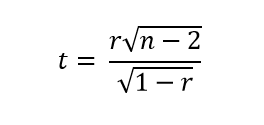

#### Case
Sebagi contoh percobaan, kita memakai data pada case corrcoef dengan taraf signifikansi sebesar 95%.<br>
Hipotesis Nol: rho = 0<br>
Hipotesis Alternatif: rho != 0<br>
alpha = 95%


In [2]:
from scipy import stats

#informasi
alpha = 1 - .05/2

#kalkulasi
t_hitung = (korkoef * (len(data) - 2) ** 0.5) / (np.sqrt(1 - korkoef))
nilai_kritis_atas = stats.t.ppf(alpha, (len(data) - 2))
nilai_kritis_bawah = stats.t.ppf(1 - alpha, (len(data) - 2))
p_value = 2 * (1 - stats.t.cdf(t_hitung, (len(data) - 2)))

#kesimpulan
if (t_hitung >= nilai_kritis_bawah) and (t_hitung <= nilai_kritis_atas):
    print('Nilai t hitung > nilai kritis batas bawah dan < nilai kritis batas atas, maka gagal tolak Hipotesis Nol')
else:
    print('Nilai t hitung < nilai kritis batas bawah dan > nilai kritis batas atas, maka menolak Hipotesis Nol')
print('Nilai t hitung sebesar', t_hitung)
print('Nilai batas atas sebesar', nilai_kritis_atas)
print('Nilai batas bawah sebesar', nilai_kritis_bawah)
print('Nilai p-value sebesar', p_value)
    

Nilai t hitung < nilai kritis batas bawah dan > nilai kritis batas atas, maka menolak Hipotesis Nol
Nilai t hitung sebesar 38.923080766711756
Nilai batas atas sebesar 2.048407141795244
Nilai batas bawah sebesar -2.048407141795244
Nilai p-value sebesar 0.0


### Analisis Regresi
Analisis regresi merupakan teknik untuk menjabarkan persamaan dan menghasilkan perkiraan. Persamaan regresi merupakan persamaan yang mengungkap hubungan linier antara dua variabel.<br>
Metode terbaik dalam menentukan garis regresi adalah menggunakan prinsip kuadrat terkecil atau <b> Least Square Regression</b>, yang merupakan prosedur matematis yang menggunakan data untuk menempatkan garis dengan tujuan meminimumkan penjumlahan kuadrat dari jarak vertikal di antara nilai aktual Y dengan nilai taksiran Y.

#### Bentuk Persamaan
Bentuk persamaan regresi linier adalah:
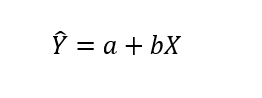
    
    Y ada topinya : Dibaca Yhat, perkiraan nilai Y untuk setiap nilai X yang dipilih
    a : Titik potong Y, yaitu nilai perkiraan Y ketika X = 0. Bisa juga disebut dengan: a merupakan perkiraan nilai Y di mana garis regresi memotong sumbu Y ketika X = 0. (Intercept/konstanta)
    b : kemiringan garis/rata-rata perubahan dalam Y untuk setiap perubahan satu unit(baik naik/turun) variabel bebas X.(koefisien regresi/slope)
    X : nilai variabel bebas apapun yang dipilih.
    Sebenarnya terdapat nilai residual atau error e juga. Untuk jaga-jaga.

Formula kemiringan garis regresi b:
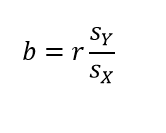
    
Formula titik potong Y (a):
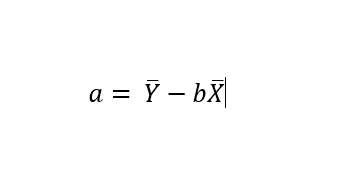

#### Menggambar Regresi
Selanjutnya mencoba menggambar regresi menggunakan data pada case sebelumnya   

     X   Y
0  120  40
1  171  41
2  187  68
3  199  70
4  202  74


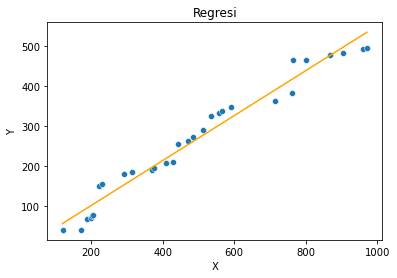

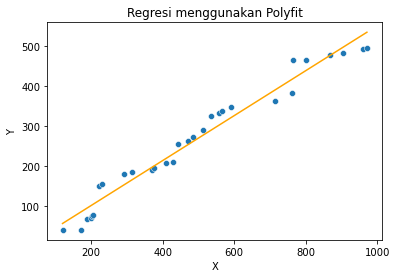

Jumlah residu sebesar 4.405364961712621e-13
Nilai Least Square Value sebesar 22234.97524215295


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#informasi
print(data.head())

#kalkulasi
slope = data['X'].corr(data['Y']) * np.std(data['Y'], ddof = 1) / np.std(data['X'], ddof = 1)
intercept = np.mean(data['Y']) - slope * np.mean(data['X'])
Yhat = data['X'].apply(lambda x: intercept + slope * x)

#Plotting
sns.scatterplot(x = data['X'], y = data['Y'])
sns.lineplot(x = data['X'], y = Yhat, color = 'orange')
plt.title('Regresi')
plt.show()

#menggunakan np.polyfit
slope, intercept = np.polyfit(data['X'], data['Y'], 1)

sns.scatterplot(x = data['X'], y = data['Y'])
sns.lineplot(x = data['X'], 
             y = intercept + slope * data['X'], color = 'orange')
plt.title('Regresi menggunakan Polyfit')
plt.show()

#hasil
print('Jumlah residu sebesar', np.sum(data['Y'] - Yhat))
print('Nilai Least Square Value sebesar', np.sum((data['Y'] - Yhat) ** 2))

### Signifikansi Kemiringan
Uji hipotesis kemiringan garis populasi adalah 0. Uji ini juga disebut uji koefisien korelasi. Hipotesisnya yakni:<br>
Hipotesis Nol: beta (b) = 0<br>
Hipotesis alternatif: beta (b) != 0

#### Formula
Formula yang digunakan dalam uji ini adalah menghitung t dengan derajat kebebasan n - 2.
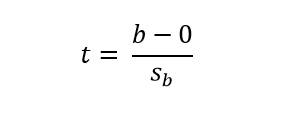
    
    s sub b : kesalahan standar dari perkiraan kemiringan yang telah ditentukan melalui informasi sampel

Mencari s sub b:
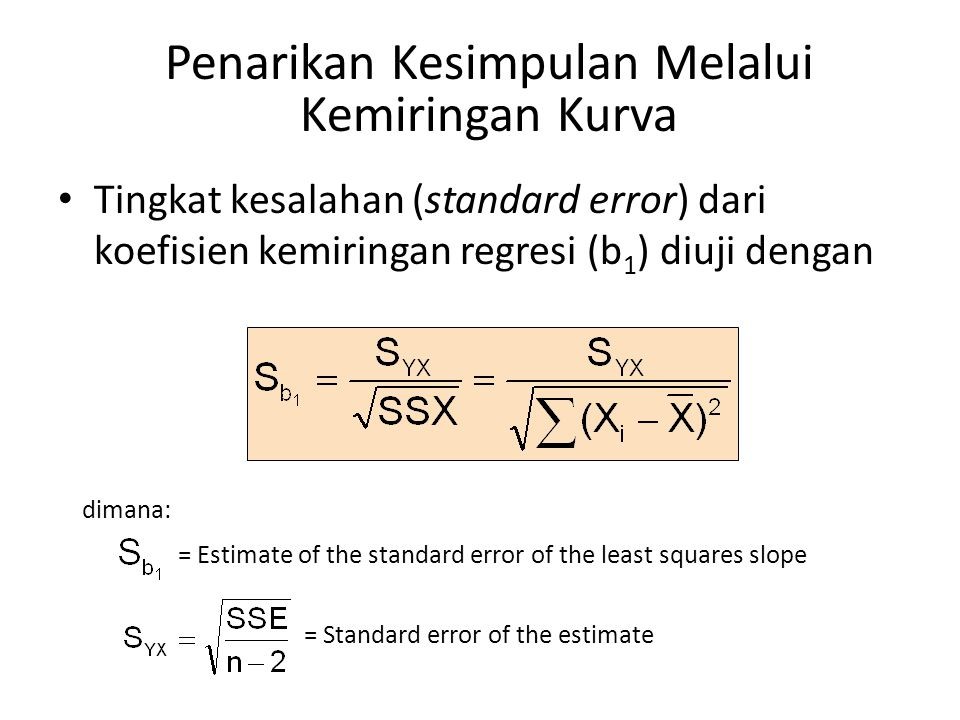


### Kesalahan Standar Estimasi (Root Mean Square Error/RMSE)
Kesalahan standar estimasi mengukur variasi di sekitar garis regresi.
1. Satuannya sama dengan variabel terikat
2. Didasarkan kuadrat deviasi regresinya, dan nilai yang kecil menunjukkan bahwa titik berkumpul di dekat garis regresinya.

#### Formula
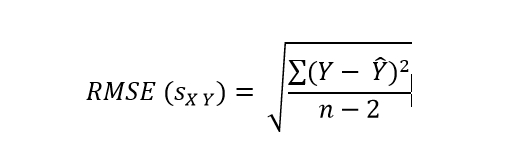

    Untuk penyebut, apabila data berupa sampel, maka degree of freedom adalah n - 2. Sedangkan untuk populasi menggunakan N


### Koefisien Determinasi (R-squared)
Koefisien determinasi merupakan proporsi variasi dari variabel terikat yang dijelaskan oleh variasi bebas.
1. Nilainya berkisar 0 - 1.0
2. Nilainya merupakan kuadrat dari koefisien korelasi r
3. Dalam tabel ANOVA, formula yang membentuknya adalah sebagai berikut:

#### Formula
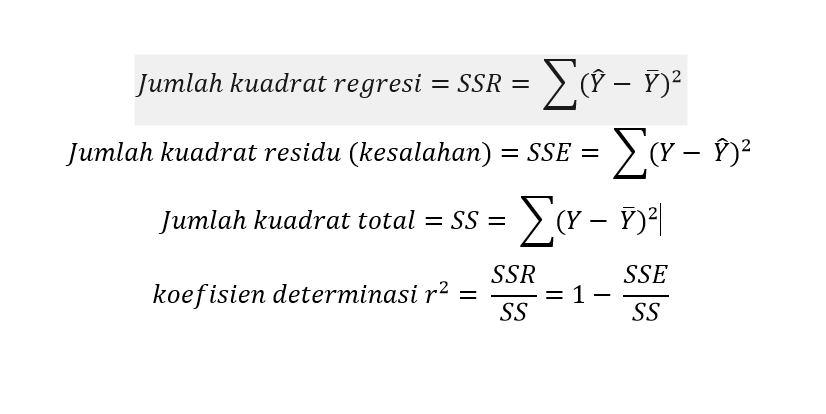

### Asumsi dari kesimpulan mengenari Regresi Linier
1. Untuk setiap nilai X, nilai Y (Yhat, yang di regresinya lho ya) terdistribusi normal di sekitar garis regresi.
2. Standar deviasi dari setiap distribusi normal sama untuk seluruh nilai X dan diperkirakan oleh kesalahan standar estimasi.
3. Deviasi dari garis regresi saling bebas, tanpa adanya pola berupa ukuran atau arah.


### Estimasi Interval
#### Interval Kepercayaan (Confidence Interval)
Dalam interval kepercayaan (Confidence Interval), rata-rata nilai Y diperkirakan untuk setiap nilai X
1. Dihitung menggunakan:
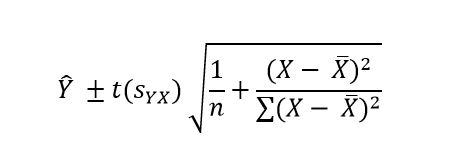
2. Lebar interval dipengaruhi oleh squared error, tingkat kepercayaan, ukuran kesalahan standar estimasi, ukuran sampel, dan nilai variabel bebas.

#### Interval Prediksi (Prediction Interval)
1. Dihitung menggunakan:
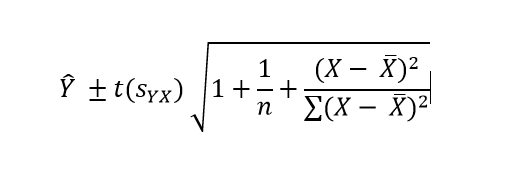
2. Selisih antara interval prediksi dan kepercayaan sebesar 1 dalam akarnya.
3. Interval prediksi bernilai lebih besar daripada interval kepercayaan, yang lebarnya dipengaruhi oleh squared error, tingkat kepercayaan, ukuran kesalahan standar estimasi, ukuran sampel, dan nilai variabel bebas.

### Case
Mengerjakan tiap-tiap bagian di atas menggunakan data sebelumnya.

#### Signifikansi Kemiringan


In [4]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

#preprocess
X = data.X
Y = data.Y

model = OLS(Y, sm.add_constant(X))
result = model.fit()
print(result.summary(), '\n')

#f_test - Uji ANOVA
print(result.f_test(np.identity(2)[1:,:]), '\n')

#t-test - Uji kemiringan/slope
print(result.t_test(np.identity(2)), '\n')

#f-test menggunakan ANOVA
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

formula = 'Y ~ X'
model_anova = ols(formula = formula, data = data).fit()
anova_table = anova_lm(model_anova, typ = 2)
print(model_anova.summary(), '\n')
print('Anova Table')
print(anova_table, '\n\n')

#Linear Regression menggunakan Sklearn
from sklearn.linear_model import LinearRegression
X_sklearn = X.to_numpy().reshape((-1, 1))

regr = LinearRegression().fit(X_sklearn, Y)

Y_pred = regr.predict(X_sklearn)
print('Linreg menggunakan Sklearn')
print('-----------------------------')
print('Nilai Koefisien Determinasi R2 sebesar', regr.score(X_sklearn, Y))
print('Nilai intercept sebesar', regr.intercept_)
print('Nilai slope sebesar', regr.coef_)



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     764.3
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           7.20e-22
Time:                        21:12:21   Log-Likelihood:                -141.69
No. Observations:                  30   AIC:                             287.4
Df Residuals:                      28   BIC:                             290.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4357     11.185     -1.022      0.3

## Multivariate Regression
### Persamaan Multivariate Linear Regression
Persamaan regresi linear berganda
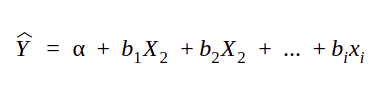

Dengan alpha merupakan titik potong ketika Y ketika seluruh X sama dengan nol, b sub i mengacu pada koefisien regresi sampel, dan X sub i mengacu pada nilai berbagai variabel bebasnya.
1. Terdapat sejumlah variabel bebas.
2. Kriteria kuadrat terkecil digunakan untuk membuat persamaan regresi (Least Square)
3. Menghitungnya pakai bantuan software.

### Evaluasi Persamaan Regresi Ganda
Dalam mengevaluasi persamaan regresi ganda, sala satu caranya adalah menggunakan tabel ANOVA. 
1. ANOVA digunakan sebagai summary untuk melaporkan jumlah variasi pada variabel terikat dan membagi variasi tersebut menjadi variasi yang dijelaskan oleh sekumpulan variabe bebas dan variasi yang tidak dijelaskan.
2. Tabel tersebut melaporkan derajat kebebasan yang terkait dngan variabel bebas, variasi kesalahan, dan total variasi.

### Ukuran Efektivitas Persamaan Regresi
Menggunakan kesalahan standar estimasi berganda/RMSE yang serupa dengan standar deviasinya
1. Nilainya diukur dalam satuan yang sama dengan variabel terikatnya.
2. Nilainya didasarkan pada kuadrat deviasi dari persamaan regresinya.
3. Nilainya berkisar dari 0 hingga ~
4. Persamaannya sebagai berikut:
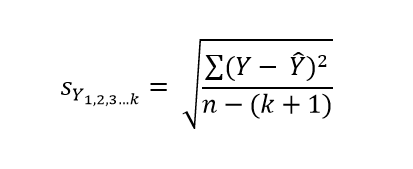

Koefisien determinasi berganda menyajikan persen variasi variabel terikat yang dijelaskan oleh sekumpulan variabel bebas.
1. Nilainya berksiar 0 sampai 1
2. Nilainya juga dapat diambil dari kuadrat deviasi dari persamaan regresinya.
3. Nilainya diperoleh dari persamaan berikut:
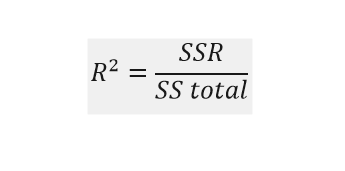
4. Ketika jumlah variabel bebasnya besar, koefisien determinasinya disesuaikan untuk derajat kebebasan sebagai berikut:
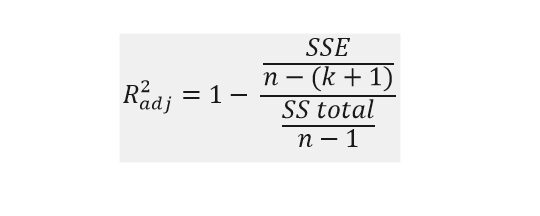


### Kesimpulan Regresi Linear Berganda
Penarikan kesimpulan Regresi Liner Berganda bisa menggunakan uji global untuk menghetahui apakah terdapat variabel bebas yang memiliki koefisien regresi yang signifikan.
1. Memiliki hipotesis nol: seluruh koefisien regresinya bernilai 0
2. Memiliki hipotesis alternatif: sedikitnya terdapat satu koefisien regresi yang tidak sama dengan 0.
3. Statistik ujinya adalah distribusi F dengan k (jumlah variabel bebas) derajat kebebasasn dari derajat kebebasan n - (k + 1) pada penyebutnya dengan n merupakan ukuran sampel.
4. Persamaan untuk menghitung nilai statistik uji global F:
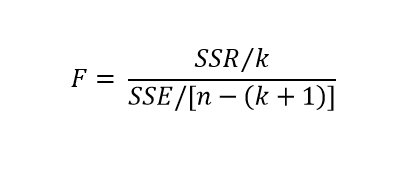

Tahapan selanjutnya adalah melakukan pengujian masing-masing variabel untuk menentukan variabel bebas manakah yang memliki koefisien regresi bukan nol.
1. Variabel yang memiliki koefisien regresi nol biasanya dikeluarkan dari analisis.
2. Statistik ujinya adalah distribusi t dengan derajat kebebasan n - (k + 1).
3. Persamaan untuk menghitung nilai uji statistiknya:
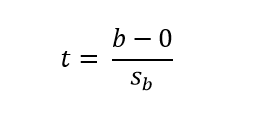


### Asumsi dalam Analisis Regresi Berganda
1. Hubungan antara variabel terikat dan sekelompok variabel bebasnya harus linier. Untuk membuktikan asumsi ini, perlu dilakukan plotting menggunakan scatter plot di mana reside berada di sumbu Y, dan nilai X-nya adalah nilai yang sesuai. Apabila plotnya terlihat acak, maka dapat disimpulkan bahwa hubungannya linier.
2. Variasi sama untuk nilai Yhat (Y-prediksi) yang besar dan kecil. Hal ini disebut dengan homoskedastisitas, tepatnya adalah variasinya sama untuk seluruh nilai variabel terikat yang sesuai. Kondisi ini diteliti menggunakan scatter plot dengan residu pada sumbu Y dan nilai yang sesuai di sumbu X. Apabila terlihat tidak ada pola dalam residunya (terlihat acak), maka residunya memenuhi syarat homoskedastisitas.
3. Residunya mengikuti distribusi probabilitas normal, dibuktikan dengan histogram residu dan qqplot, dengan rata-rata distribusinya = 0.
4. Variabel bebasnya tidak saling berkorelasi. Untuk membuktikan ini dengan menggunakan plot korelasi seperti heatmap dengan threshold < - 0.7 atau > 0.7. Tanda variabel bebas yang berkorelasi akan terlibat ketika variabel penaksir yang penting ternyata tidak signifikan, ketika pembalikkan tanda dengan jelas terjadi pada satu variabel bebas atau lebih, atau ketika terdapat suatu variabel yang dihapus dari penyelesaianya yang menyebabkan perubahan besar terhadap koefisien regresinya. Persamaan faktor inflasi variansi digunakan untuk mengetahui variabel bebas yang berkorelasi:
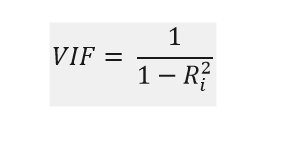
5. Masing-masing residunya saling bebas satu sama lain. Apabila saling berkorelasi, disebut autokorelasi. Apabila autokorelasi terjadi, nilai standar kesalahan standarnya akan menjadi bias dan akan memberikan hasil uji hipotesis yang buruk mengenai koefisien regresinya.


### Variabel Bebas Kualitatif
Beberapa teknik yang mempermudah pembangunan model regresi
1. Variabel dummy dapat digunakan untuk mewakili salah satu dari dua kemungkinan hasil. Nilai 1 ditujukan pada salah satu hasil dan 0 untuk yang lain. Rumus yang digunakan menggunakan uji statistik t di atas untuk menentukan apakah variabel dummy tersebut harus tetap ada atau bisa dihapuskan dalam persamaan.
2. Interaksi terjadi ketika sebuah variabel bebas X2 memengaruhi hubungan antara sebuah variabel bebas X1 dengan variabel terikat Y.
3. Regresi berjenjang merupoakan tahap demi tahap untuk mencari persamaan regresinya. Hanya variabel-variabel bebas dengan koefisien bukan nol yang dimasukkan persamaan, dan satu variabel bebas ditambahkan ke persamaan regresi pada suatu langkah tertentu.

### Case
Kita akan mencoba mengerjakan case linear regression pada data Real Estate

In [5]:
#preprocess
real_estate = pd.read_csv('real_estate.csv', index_col = False, delim_whitespace = True)
real_estate['size'] = real_estate['size'].str.replace(',', '').astype('int')

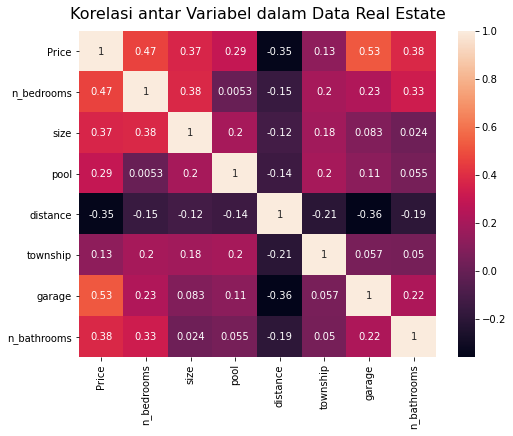

In [6]:
#Melakukan plot heatmap untuk melihat korelasi antar fitur/variabel
plt.figure(figsize = (8, 6))
sns.heatmap(data = real_estate.corr(), annot=True)
plt.title('Korelasi antar Variabel dalam Data Real Estate', size = 16, pad = 12)
plt.show()

Dari plot di atas kita dapat mengambil beberapa informasi:
1. Korelasi tertinggi adalah garage terhadap Price
2. Yang paling mendekati 0 adalah township sehinggal korelasinya terendah.
3. Korelasi yang negatif adalah distance, sisanya positif.

Kembali melanjutkan ...

In [7]:
#melakukan modelling menggunakan statsmodels
X = sm.add_constant(real_estate.drop(['Price', 'township', 'distance'], axis = 1))
Y = real_estate['Price']
model = OLS(Y, X)
result = model.fit()
print(result.summary(), '\n')

#pakai ols anova
formula = 'Price ~ n_bedrooms + size + pool + C(garage) + n_bathrooms'
model_formula = ols(formula = formula, data = real_estate, drop_cols = ['township', 'distance']).fit()
print('Menggunakan ols-anova')
print(model_formula.summary())
model_anova = anova_lm(model_formula)
print(model_anova, '\n')

#menghitung VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(model_formula.model.exog, i) for i in range(model_formula.model.exog.shape[1])]
print('VIF')
print([model_formula.model.exog_names,vif])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     21.78
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           1.19e-14
Time:                        21:12:23   Log-Likelihood:                -514.04
No. Observations:                 105   AIC:                             1040.
Df Residuals:                      99   BIC:                             1056.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.0125     35.242      0.483      

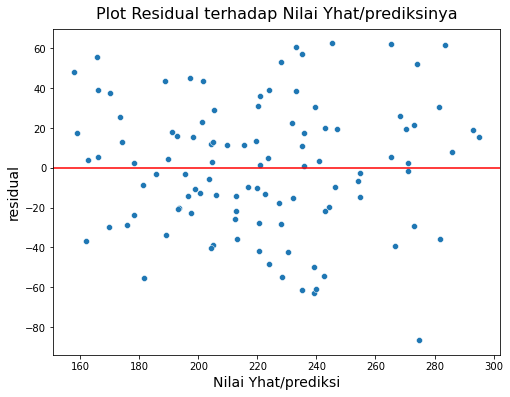

<Figure size 576x432 with 0 Axes>

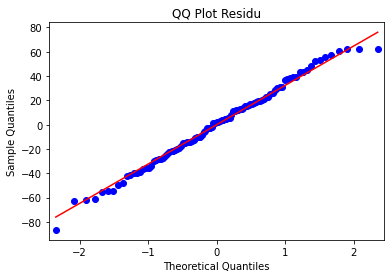

In [8]:
#Melihat Residual dari Y dengan Nilai Yhat/prediksinya melalui scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x = result.fittedvalues, y = result.resid)
plt.axhline(y = 0, color = 'r')
plt.ylabel('residual', size = 14)
plt.xlabel('Nilai Yhat/prediksi', size = 14)
plt.title('Plot Residual terhadap Nilai Yhat/prediksinya', size = 16, pad = 10)
plt.show()

#plot qqplot
plt.figure(figsize=(8,6))
qq = sm.qqplot(result.resid, 
                line = 's')
plt.title('QQ Plot Residu')
plt.show()

## Timeseries and Forecasting
Runtut waktu atau timeseries merupakan sekumpulan data sepanjang periode waktu. Berikut ini beberapa poin penting di dalam timeseries analysis:
1. Tren merupakan arah jangka panjang runtut waktu/timeseries.
2. Komponen siklis/cyclical component adalah fluktuasi di atas dan di bawah garis tren jangka panjang melewati periode waktu yang lebih lama.
3. Variasi musiman/seasonal merupakan pola runtut waktu/timeseries dalam satu tahun. Pola ini cenderung berulang dari tahun ke tahun.
4. Variasi tak beraturan/random walk dibagi menjadi dua komponen; (a) variasi episodik tidak dapat diprediksi tetapi biasanya dapat diketahui, contohnya banjir. (b) variasi residual bersifat acak

### Moving Average
Moving average digunakan untuk melunakkan tren agar data menjadi stasioner.

### Forecasting
Persamaan tren linear yakni yhat = a + bt di mana a merupakan intercept, b merupakan slope/kemiringan, dan t adalah kode waktu.
1. Menggunakan Least Square untuk menentukan persamaan trendnya
2. Jika trennya tidak linear tetapi cenderung agak meningkat dengan persentase konstan, nilai Y diubah dalam bentuk logaritma, dan persamaan least square ditentukan melalui logaritma.

### Faktor musiman/seasonal
Prosedur enam tahap menghasilkan indeks musiman untuk masing-masing periode.
1. Seasonal biasanya dihitung dengan basis bulanan/kuartal.
2. Faktor musiman digunakan untuk menyesuaikan peramalan dengan memperhitungkan pengaruh musim.

### Durbin-Watson
Durbin-Watson digunakan untuk menghitung autokorelasi.

### Case
Kita akan menggunakan dataset dari Pangan Jakarta

In [17]:
#preprocessing
df = pd.read_csv('pangan_clean.csv', parse_dates=True, index_col=0)

#ubah dataframe menjadi pivot
pivots = df.pivot(columns = ['komoditas'], values = ['harga'])

In [18]:
pivots

harga                                             \
komoditas  ayam boiler/ekor ayam kampung/ekor bawang merah (medium)/kg   
tanggal                                                                  
2018-01-02            39740             55075                    26800   
2018-01-03            38940             55075                    27800   
2018-01-04            37440             53825                    28400   
2018-01-05            36940             78825                    27900   
2018-01-08            36940             77575                    27900   
...                     ...               ...                      ...   
2018-12-21            38860             86250                    30260   
2018-12-26            39060             83750                    30960   
2018-12-27            40200             95000                    30740   
2018-12-28            39200             95000                    31440   
2018-12-31            39200             95000                    31440   

                                                                         \
komoditas  bawang putih impor (honan)/kg bawang putih impor (kating)/kg   
tanggal                                                                   
2018-01-02                         25000                          28560   
2018-01-03                         25000                          30260   
2018-01-04                         27500                          28660   
2018-01-05                         27500                          28960   
2018-01-08                         27500                          28960   
...                                  ...                            ...   
2018-12-21                         26500                          28160   
2018-12-26                         26500                          27860   
2018-12-27                         25500                          27260   
2018-12-28                         25500                          27260   
2018-12-31                         25500                          27260   

                                                                  \
komoditas  beras medium/kg beras premium/kg cabai merah besar/kg   
tanggal                                                            
2018-01-02           11340            13340                37260   
2018-01-03           11440            13440                37260   
2018-01-04           11490            13490                39260   
2018-01-05           11740            13740                40260   
2018-01-08           11740            13740                40260   
...                    ...              ...                  ...   
2018-12-21           13187            12437                42200   
2018-12-26           13187            12375                43700   
2018-12-27           13250            12700                40560   
2018-12-28           13375            12825                40060   
2018-12-31           13375            12825                40560   

                                                         ...                  \
komoditas  cabai merah keriting/kg cabai rawit hijau/kg  ... ketela pohon/kg   
tanggal                                                  ...                   
2018-01-02                   37140                34800  ...            5060   
2018-01-03                   38640                35300  ...            5060   
2018-01-04                   39340                41400  ...            5060   
2018-01-05                   42340                40400  ...            4960   
2018-01-08                   42340                40400  ...            4960   
...                            ...                  ...  ...             ...   
2018-12-21                   33660                27240  ...            5340   
2018-12-26                   34060                27440  ...            5340   
2018-12-27                   32800                28440  ...            5340   
2018-12-28           